## Plotting the ages of oceanic lithosphere on a global map
Feel free to modify or play around with the different parameters!

Packages required on your system:
* PyGMT (and corresponding libraries, e.g. pandas, numpy, xarray), still under development (see <https://www.pygmt.org/dev/overview.html>)

author: M. Grund (2020-04-20)

In [1]:
import pygmt
import xarray as xr
import os

# define parameters for plotting
pygmt.config(COLOR_BACKGROUND = 'white',
             MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
             MAP_ANNOT_OFFSET_PRIMARY = '5p',
             MAP_ANNOT_OFFSET_SECONDARY = '5p', 
             FONT_ANNOT_PRIMARY = '8p,Helvetica', 
             FONT_LABEL = '8p',
             MAP_FRAME_WIDTH = '2p',
             MAP_FRAME_PEN = '1.2p',
             MAP_TICK_LENGTH_PRIMARY = '0i')

ModuleNotFoundError: No module named 'pygmt'

Data containing the seafloor ages of **Müller et al. (2008)** were downloaded from ftp://ftp.earthbyte.org/earthbyte/agegrid/2008/Grids/.
Different formats are available, in the following we use the file `age.3.6.nc` that was unzipped from the downloaded `age.3.6.nc.bz2` file.

* First we read in the netCDF file (netCDF3 version) using `xarray` (`xr.open_dataset(filein)`). 
* Afterwards we recalculate the ages to Ma since in `age.3.6.nc` they are given in absolute millions with lots of zeros ;). 
* Since currently there appear some errors using the xarray.DataArray directly with `grdimage` (see below) we write the recalculated data to a new ouput file `age.3.6.nc4.nc` (netCDF4 version).

In [2]:
filein = 'age.3.6.nc'
gridin = xr.open_dataset(filein)
gridma = gridin.z * 0.01 # recalculate the ages to Ma
gridout = 'age.3.6.nc4.nc'
gridma.to_netcdf(gridout, format = 'NETCDF4')

Create a new pygmt figure object.

In [3]:
fig = pygmt.Figure()

Define the colormap(s) to use. Set `reverse = True` if you want to reverse the colormap. `M = ''` ensures that the background color defined in the beginning (`COLOR_BACKGROUND = 'white'`) is used.

In [4]:
cmap2use = 'viridis' # or 'inferno', 'devon', 'lajolla' ....
pygmt.makecpt(cmap = cmap2use, reverse = True, series = [0, 180, 10], output = 'cmap_age_' + cmap2use + '.cpt', 
              continuous = True, M = '')
cwd = os.getcwd()

Next we plot the grid using a Robinson projection (`projection = 'N0/3.5i'`) 
* centered at 0° longitude 
* with a size of 3.5i 
* between -180°/+180° in longitude (`region = d`). 

The grid is color-coded with the defined colormap `cmap_age*.cpt`

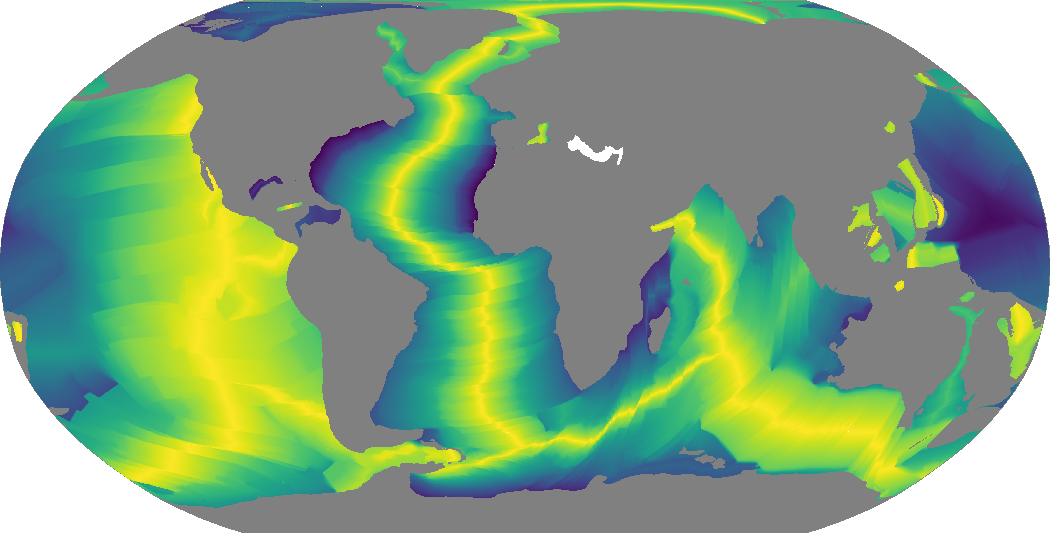

In [5]:
fig.grdimage(gridout, cmap = cwd + '/cmap_age_' + cmap2use + '.cpt', region = 'd', projection = 'N0/3.5i')
fig.show()

Now we plot the continents in lighter gray color on top (`land = col_cont`). A frame, lat/lon gridlines and annotations are added via `frame`. 
* Here `'x90g30'` gives annotations in x direction every 90°'s and lines every 30°'s. 
* The same for the y direction with lines every 15°'s is given by `'y30g15'`. 
* Only annotate the "south axis" is defined by `'weSn'`.

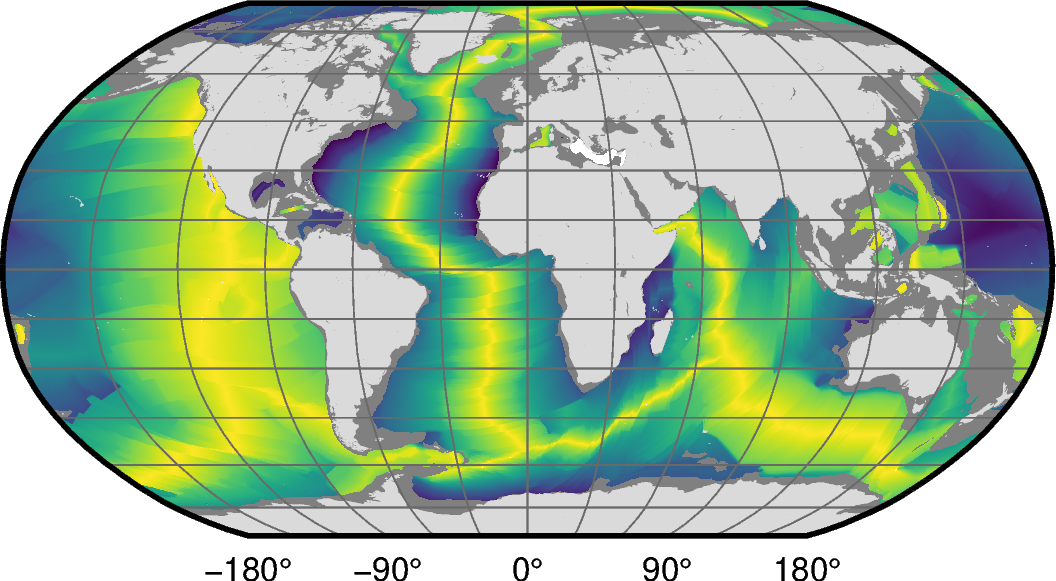

In [6]:
col_cont = '217.6/217.6/217.6'
fig.coast(land = col_cont, resolution = 'c', frame = ['x90g30', 'y30g15', 'weSn'])
fig.show()

Next, we add a colorbar on top.

* The position of the colorbar is 1.3 units in x- and 5.2 units in y-direction direction from the origin in the lower left corner (`x1.3/5.2`)
* The size is given by a width of 2.5i and a height of 0.1i (`w2.5i/0.1i`)
* The white triangle on the right-hand side of the bar is defined by `ef0.06i`
* Locating the label defined in `frame` above the colorbar is handled by `ml`
* The horizontal orientation of the colorbar is set by `h`


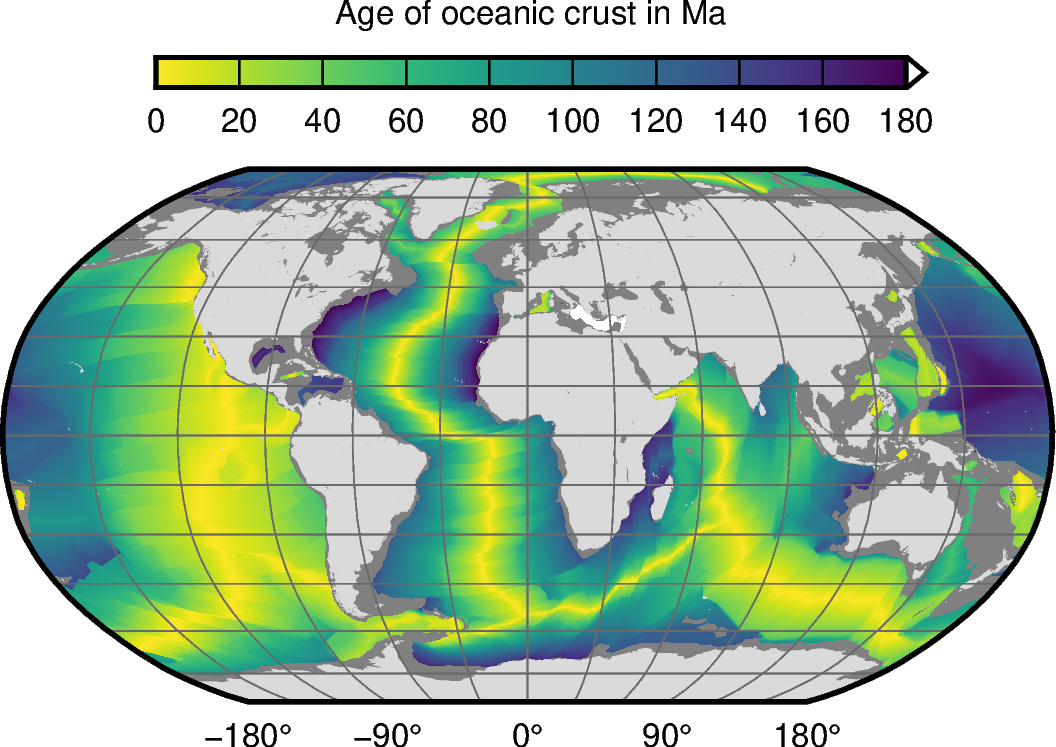

In [7]:
# adjust some settings for plotting the scale
with pygmt.config(MAP_ANNOT_OFFSET_SECONDARY = '0.14i',
                  MAP_TICK_LENGTH_PRIMARY = '-0.1i',
                  MAP_FRAME_PEN = '1p'): 
    
    fig.colorbar(cmap = cwd + '/cmap_age_' + cmap2use + '.cpt', position = 'x1.3/5.2+w2.5i/0.1i+ef0.06i+ml+h', 
                 box = False, frame = ['xa20+l"Age of oceanic crust in Ma"'])

fig.show()

Finally, save the figure in png format with a resolution of 600 dpi.

In [8]:
fig.savefig('PLOT_sf_ages.png', dpi = 600)

### References

* Müller, R. D., Sdrolias, M., Gaina, C., & Roest, W. R. (2008), Age, spreading rates, and spreading asymmetry of the world’s ocean crust, Geochem. Geophys. Geosyst., 9(4), https://doi.org/10.1029/2007GC001743